Simulation and PINN Model Development for 3D cube 

Importing the libraries

In [123]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import csv
from sklearn import svm
import pandas as pd
import itertools
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split


Defining the physical constants

In [124]:
# Parameters

length = 1  # Length of the rod
breadth = 1 # Breadth of the rod
height = 1 # Height of the rod
time_end = 1200 # End time
num_points = 10 # Number of spatial points
num_steps = 10  # Number of time steps
L_fusion = 3.98e5 # J/kg
k = 190 # W/m-K
# Material properties
rho = 2700  # Density of aluminum (kg/m^3)
cp = 880  # Specific heat of aluminum (J/kg-K)
alpha = k/(rho*cp)  # Thermal diffusivity
T_L =  650 # Liquidius Temperature
T_S = 620 # Solidus Temperature

Defining the domain

In [125]:
# Spatial and time discretisation
dx = length / (num_points - 1) #discretisation in X axis
dy = breadth / (num_points - 1) #discretisation in Y axis
dz = height / (num_points - 1) #discretisation in Z axis
dt = time_end / num_steps  #discretisation of time 
time_steps = np.linspace(0, time_end, num_steps + 1)
shape = (num_points,num_points,num_points) 




Boundary conditions

In [126]:
temperature[0:num_points, 0:num_points, 0] = 40  # temperature at x,y plane at origin is 40
temperature[0:num_points, 0:num_points, num_points - 1] = 40  # temperature at x,y plane at length L is 40

temperature[0, 0:num_points, 0:num_points] = 40  # temperature at y,z plane at origin is 40
temperature[num_points - 1, 0:num_points, 0:num_points] = 40  # temperature at y,z plane at length L is 40

temperature[0:num_points, 0, 0:num_points] = 40  # temperature at z,x plane at origin is 40
temperature[0:num_points, num_points - 1, 0:num_points] = 40  # temperature at z,y plane at length L is 40


In [127]:
# Finite difference method


for m in range(1, num_steps + 1):
    for x in range (1,num_points):
      for y in range (1,num_points):
        for z in range (1, num_points):
           if temperature[x,y,z] > 650:
              temperature[1:-1,1:-1,1:-1] = ( temperature[1:-1,1:-1,1:-1] + alpha * dt / dx**2 * (temperature[2:,2:,2:] - 2 * temperature[1:-1,1:-1,1:-1] + temperature[:-2,2:,2:]))
              phase[x,y,z] = 0
           elif (temperature[x,y,z] < T_L) & (temperature[x,y,z] > T_S):
              temperature[1:-1,1:-1,1:-1] = ( temperature[1:-1,1:-1,1:-1] - ((alpha * dt*(T_L-T_S)) / rho*L_fusion*dx**2 * (temperature[2:,2:,2:] - 2 * temperature[1:-1,1:-1,1:-1] + temperature[:-2,2:,2:])))
              phase[x,y,z] = (T_L- temperature[x,y,z])/ (T_L-T_S)
           elif temperature[x,y,z] < T_S:
              temperature[1:-1,1:-1,1:-1] = ( temperature[1:-1,1:-1,1:-1] + alpha * dt / dx**2 * (temperature[2:,2:,2:] - 2 * temperature[1:-1,1:-1,1:-1] + temperature[:-2,2:,2:]))
              phase[x,y,z] = 1
    
      
    temperature_history.append(temperature.copy())
    phi_history.append(phase.copy())



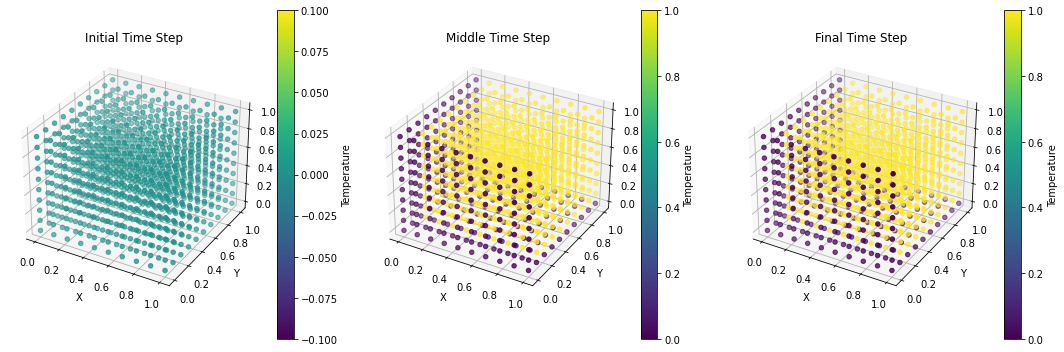

In [128]:
# Plotting Initial, Middle, and Final Time Steps
fig = plt.figure(figsize=(15, 5))

# Initial Time Step
ax1 = fig.add_subplot(131, projection='3d')
ax1.set_title('Initial Time Step')
ax1.set_xlabel('X')
ax1.set_ylabel('Y')
ax1.set_zlabel('Z')
scatter1 = ax1.scatter(X.flatten(), Y.flatten(), Z.flatten(), c=phi_history[0].flatten(), cmap='viridis')
fig.colorbar(scatter1, ax=ax1, label='Temperature')

# Middle Time Step
ax2 = fig.add_subplot(132, projection='3d')
ax2.set_title('Middle Time Step')
ax2.set_xlabel('X')
ax2.set_ylabel('Y')
ax2.set_zlabel('Z')
scatter2 = ax2.scatter(X.flatten(), Y.flatten(), Z.flatten(), c=phi_history[num_steps // 2].flatten(), cmap='viridis')
fig.colorbar(scatter2, ax=ax2, label='Temperature')

# Final Time Step
ax3 = fig.add_subplot(133, projection='3d')
ax3.set_title('Final Time Step')
ax3.set_xlabel('X')
ax3.set_ylabel('Y')
ax3.set_zlabel('Z')
scatter3 = ax3.scatter(X.flatten(), Y.flatten(), Z.flatten(), c=phi_history[-1].flatten(), cmap='viridis')
fig.colorbar(scatter3, ax=ax3, label='Temperature')

plt.tight_layout()
plt.show()